# 20 September 2021

# Multiple Linear Regression

### **Analyze diamonds dataset**

     - Carat, depth, table, x, y, z as numerical independent variable
     - Cut, color, clarity as categorical independent variable
     - Price as dependent variable

### - Analyze the relationship
### - Apply Multiple Linear Regression with dummy variable
### - Perform Simultant Test and Partial Test
### - Check the assumptions
### - Interpret the result
### - Use α 5%

**Try to find the best model without any multicollinearity, or at least the least one.**


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## **Dataset info**
https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data

A data frame with 53940 rows and 10 variables:

1. price<br>
price in US dollars (\$326--\$18,823)
<br><br>
2. carat<br>
weight of the diamond (0.2--5.01)
<br><br>
3. cut<br>
quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br><br>
4. color<br>
diamond colour, from J (worst) to D (best)
<br><br>
5. clarity<br>
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br><br>
6. x<br>
length in mm (0--10.74)
<br><br>
7. y<br>
width in mm (0--58.9)
<br><br>
8. z<br>
depth in mm (0--31.8)
<br><br>
9. depth<br>
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br><br>
10. table<br>
width of top of diamond relative to widest point (43--95)

In [2]:
# Load dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# Check numerical features statistical description
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Check numerical features correlation
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## **Create dummy variables**

In [6]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0


## **Check correlation**

In [7]:
df_dummy.corr()['price']

carat            0.921591
depth           -0.010647
table            0.127134
price            1.000000
x                0.884435
y                0.865421
z                0.861249
cut_Premium      0.095706
cut_Very Good    0.006593
cut_Good        -0.000312
cut_Fair         0.018728
color_E         -0.101089
color_F         -0.024161
color_G          0.008556
color_H          0.059223
color_I          0.097125
color_J          0.081710
clarity_VVS1    -0.095266
clarity_VVS2    -0.052381
clarity_VS1     -0.009886
clarity_VS2     -0.001062
clarity_SI1      0.008957
clarity_SI2      0.128420
clarity_I1      -0.000255
Name: price, dtype: float64

## **Select features**

In [8]:
df_dummy.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

### **Intrepretasi**

**x, y, z tidak digunakan sebagai inputan model karena memiliki korelasi yang tinggi dengan carat.**

In [9]:
# Membuat model OLS
fitur = ['carat', 'depth', 'table', 'cut_Good',
       'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']
target = 'price' 
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [10]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.536e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:25:03   Log-Likelihood:            -4.6185e+05
No. Observations:               53940   AIC:                         9.237e+05
Df Residuals:                   53920   BIC:                         9.239e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2090.5462    387.327      5.397

In [11]:
# Function to calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes', 'No') 
    return (vif) 

In [12]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,4.930581,No
1,depth,483.450112,No
2,table,504.190422,No
3,cut_Good,1.323400,Yes
4,cut_Fair,1.114189,Yes
5,cut_Premium,2.096687,Yes
6,cut_Very Good,1.715219,Yes
7,color_E,2.453895,Yes
8,color_F,2.438087,Yes
9,color_G,2.763646,Yes


### **Intrepretasi**

Dari hasil perhitungan nilai VIF di atas, dapat dilihat bahwa masih terdapat multicollinearity. Feature seperti depth dan table memiliki nilai VIF yang sangat tinggi. Oleh karena itu, kita coba untuk men-drop 2 fitur tersebut.

In [13]:
# Membuat model OLS dengan men-drop fitur depth dan table
fitur = ['carat', 'cut_Good', 'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
target = 'price' 
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [14]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.826e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:25:06   Log-Likelihood:            -4.6192e+05
No. Observations:               53940   AIC:                         9.239e+05
Df Residuals:                   53922   BIC:                         9.240e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2372.9626     30.929    -76.724

In [15]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,4.685576,No
1,cut_Good,1.246060,Yes
2,cut_Fair,1.091418,Yes
3,cut_Premium,1.693924,Yes
4,cut_Very Good,1.570663,Yes
5,color_E,2.084755,Yes
6,color_F,2.044126,Yes
7,color_G,2.256704,Yes
8,color_H,1.995577,Yes
9,color_I,1.723922,Yes


### **Intrepretasi**

Dari hasil perhitungan nilai VIF di atas, terlihat hanya carat yang memiliki nilai VIF sedikit di atas 4, sedangkan fitur lainnya tidak memiliki masalah multicollinearity lagi.

Sekarang, mari kita coba untuk mencoba kombinasi lainnya, yaitu yang pertama dengan men-drop fitur clarity, dan yang kedua dengan men-drop fitur cut.

In [16]:
# Membuat model OLS dengan men-drop fitur cut
fitur = ['carat', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
target = 'price' 
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 3.523e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:25:07   Log-Likelihood:            -4.6307e+05
No. Observations:               53940   AIC:                         9.262e+05
Df Residuals:                   53926   BIC:                         9.263e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2543.9696     31.281    -81.326   

In [18]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,4.560209,No
1,color_E,2.071531,Yes
2,color_F,2.030442,Yes
3,color_G,2.245189,Yes
4,color_H,1.985513,Yes
5,color_I,1.720701,Yes
6,color_J,1.418589,Yes
7,clarity_SI1,2.521937,Yes
8,clarity_SI2,2.361101,Yes
9,clarity_VS1,1.961082,Yes


### **Intrepretasi**

Tanpa fitur 'cut', nilai VIF dari carat masih sedikit lebih dari 4.

In [24]:
# Membuat model OLS dengan men-drop fitur clarity
fitur = ['carat', 'cut_Good', 'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']
target = 'price' 
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[fitur]))
result = sm_lm.fit()

In [25]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 3.315e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:43:56   Log-Likelihood:            -4.6851e+05
No. Observations:               53940   AIC:                         9.370e+05
Df Residuals:                   53928   BIC:                         9.372e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1952.0169     20.498    -95.228

In [26]:
calc_vif(df_dummy[fitur])

,variables,VIF,Acceptable
0,carat,3.713217,Yes
1,cut_Good,1.200881,Yes
2,cut_Fair,1.086484,Yes
3,cut_Premium,1.601297,Yes
4,cut_Very Good,1.478597,Yes
5,color_E,1.416202,Yes
6,color_F,1.463930,Yes
7,color_G,1.567415,Yes
8,color_H,1.562867,Yes
9,color_I,1.443602,Yes


### **Intrepretasi**

Ternyata, dengan men-drop fitu clarity, kita mendapatkan nilai VIF di bawah 4 semua.

## **Cek Asumsi**

### **Asumsi-asumsi yang harus dipenuhi:**

1. **Linear relationship:** Terdapat hubungan linear antara variabel independen (x) dan variabel dependen (y).

2. **Independence:** Residuals bersifat independen atau tidak memiliki korelasi dengan residual lainnya. 

3. **Homoscedasticity:** Residual memiliki variance yang konstan.

4. **Normality:** Residual dari model terdistribusi dengan normal.

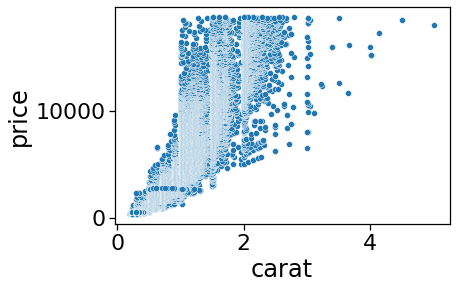

In [27]:
sns.scatterplot(x='carat', y='price', data=df_dummy);

### **Normality assumption**

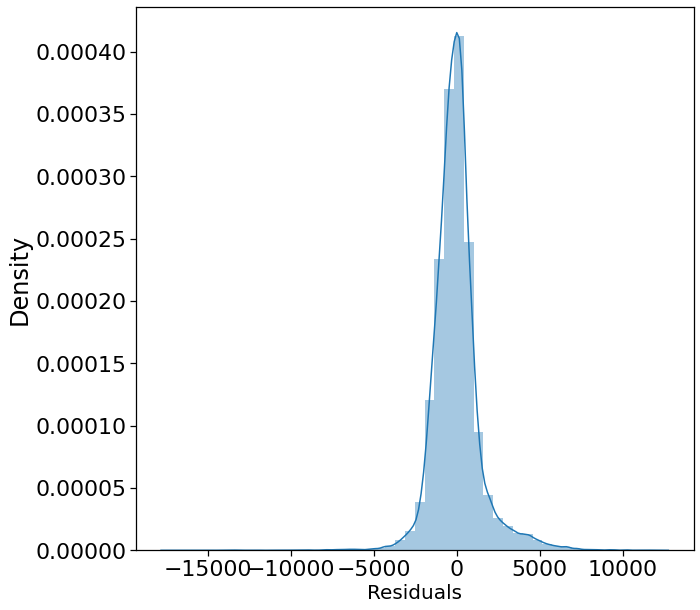

In [21]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20);

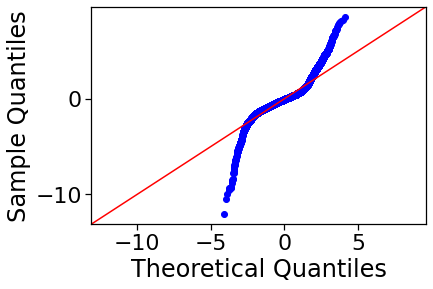

In [22]:
# Cek dengan menggunakan QQ plot
sm.qqplot(result.resid, line = '45', fit=True);

### **Interpretasi**

Kalau residualnya mengikuti 45 derajat, berarti residualnya mengikuti distribusi normal.

Tidak disarankan untuk menggunakan normal test pada dataset yang besar, karena pada dataset yang besar, hasil dari normaltest menjadi tidak dapat dipercaya karena hasilnya akan disimpulkan menjadi tidak normal. Jadi, lebih baik menggunakan visualisasi.

### **Cek asumsi Gauss-Markov**

Yang dilihat adalah errornya. Dengan asumsi:

* Rata-rata error pada populasi adalah nol. 
* Error tidak berkorelasi dengan error lainnya.
* Error memiliki ragam yang homogen.

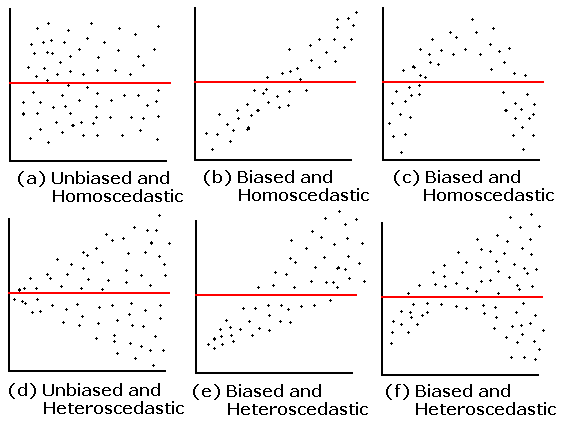

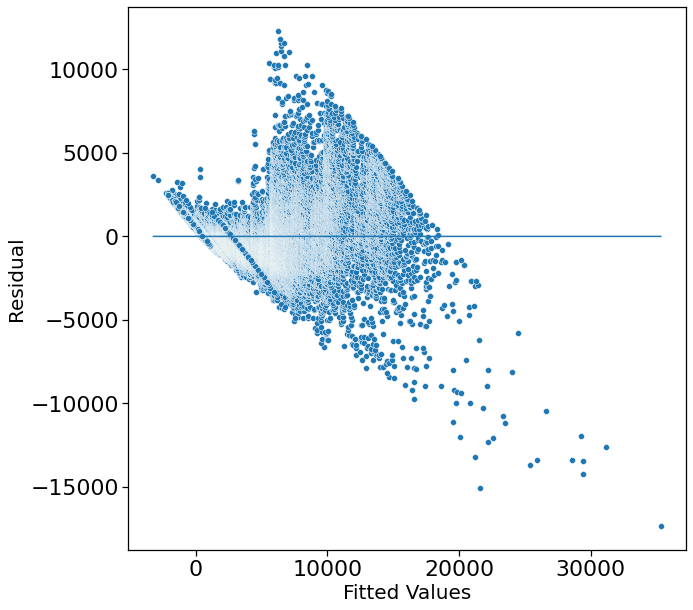

In [23]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residual', fontsize=20);

### **Interpretasi**

1. Jika melihat dari histogram, residual terlihat terdistribusi dengan normal. Akan tetapi, setelah divalidasi dengan menggunakan QQ-plot, terlihat persebaran residualnya tidak mengikuti garis 45 derajat. Ini berarti, asumsi normalitas tidak terpenuhi.
2. Residual tidak tersebar di sekitar 0. Ini berarti, asumsi Gauss-Markov pun tidak terpenuhi.
3. Kalau berdasarkan gambar referensi, plot residual bersifat bias dan homoscedasticity.

Dengan kata lain, meskipun tidak terdapat multicollinearity (nilai VIF terpenuhi) dan juga adj. r-squared yang tinggi, namun kita tidak bisa terlalu percaya pada hasil prediksi yang diberikan oleh model. Hal ini disebabkan oleh adanya beberapa asumsi model linear regresi yang tidak terpenuhi, sehingga output model menjadi bias.